# Overview
This is data for customers using Credit Card , having 25 columns with their Eductaion, Martial Status, Age , Pays and  previous Bill and payments for cc, so based on this information we will predict whether in future the customer will default the CC payment or not.

I am using XGBoost for model, Randomised search for parameter tuning and also made it in 3 hidden layer Artificial neural network with SGD optimizer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df= pd.read_csv('Credit_Card_Data.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# As we dont need ID column, we are dropping it
df.drop('ID',axis=1,inplace=True)

In [5]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [7]:
df.rename(columns={'default.payment.next.month':'defaulters'}, inplace=True)

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
#No null Values
df.isnull().values.any()

False

In [10]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulters
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


No Null Values and zero are acceptables as payments

In [11]:
# Checking the categories
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [12]:
# As per problem we are combining 4-5-6 categories
df["EDUCATION"]= df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

In [13]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [14]:
df["MARRIAGE"]=df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [15]:
#Variable interpretation
x= df.drop('defaulters',axis=1) 
y=df.loc[:,'defaulters']

In [16]:
# As in describe we noticed feature are not normalise , they have huge variance so standarising them
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x= ss.fit_transform(x)

In [17]:
from sklearn.model_selection import RandomizedSearchCV
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20 ] ,
 "max_depth"        : [ 3, 4, 5, 6],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [18]:
import xgboost
from xgboost import XGBClassifier

In [19]:
classifier= XGBClassifier()

In [20]:
%timeit
Random_Grid= RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5, n_jobs=-1, random_state=12,verbose=3)

In [21]:
Random_Grid.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   58.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [23]:
best= Random_Grid.best_params_

In [24]:
Random_Grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
best

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [26]:
classifier= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)

In [31]:
%timeit
classifier.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
yp=classifier.predict(xtest)

In [33]:
classifier.score(xtest,ytest)

0.8225

In [39]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(classifier,xtest,ytest,cv=10,scoring='accuracy')

In [40]:
cv_score.mean()

0.8181648689764879

# GridSearchCv

In [41]:
# classifier= XGBClassifier()

# grid= GridSearchCV(classifier,param_grid=params, n_jobs=-1,scoring='roc_auc',cv=5,verbose=3)

# grid.fit(xtrain,ytrain)

# ANN

In [54]:
# USing ANN
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers #https://keras.io/optimizers/

classifier1=Sequential()
#Input and HL1
classifier1.add(Dense(units=12, 
                     activation='relu',
                     kernel_initializer='uniform',
                     input_shape= (xtrain.shape[1],) ))

#HL2
classifier1.add(Dense(units=12, 
                     activation='relu',
                     kernel_initializer='uniform',
                    ))

# HL3
classifier1.add(Dense(units=12, 
                     activation='relu',
                     kernel_initializer='uniform',
                     ))

# output layer
classifier1.add(Dense(units=1, 
                     activation='sigmoid',
                     kernel_initializer='uniform',
                      ))

#Compiling the data
optimizer= optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
classifier1.compile(optimizer= optimizer,
                  loss= ['binary_crossentropy'], # This refers to the loss function for binary output,
                   #for ordinal it will 'categorical_crossentropy'
                   metrics= ['accuracy']
                  )

#Fitting the ANN
classifier1.fit(xtrain,ytrain,batch_size=100,epochs=200)

Epoch 1/200
24000/24000 [==============================] - 2s 68us/step - loss: 0.5482 - acc: 0.7773
Epoch 2/200
24000/24000 [==============================] - 1s 26us/step - loss: 0.5302 - acc: 0.7774
Epoch 3/200
24000/24000 [==============================] - 1s 23us/step - loss: 0.5302 - acc: 0.7774
Epoch 4/200
24000/24000 [==============================] - 1s 23us/step - loss: 0.5302 - acc: 0.7774
Epoch 5/200
24000/24000 [==============================] - 1s 23us/step - loss: 0.5302 - acc: 0.7774
Epoch 6/200
24000/24000 [==============================] - 0s 18us/step - loss: 0.5302 - acc: 0.7774
Epoch 7/200
24000/24000 [==============================] - 0s 18us/step - loss: 0.5302 - acc: 0.7774
Epoch 8/200
24000/24000 [==============================] - 0s 18us/step - loss: 0.5302 - acc: 0.7774
Epoch 9/200
24000/24000 [==============================] - 1s 24us/step - loss: 0.5302 - acc: 0.7774
Epoch 10/200
24000/24000 [==============================] - 1s 21us/step - loss: 0.5302 - a

24000/24000 [==============================] - 0s 16us/step - loss: 0.4236 - acc: 0.8209
Epoch 82/200
24000/24000 [==============================] - 0s 17us/step - loss: 0.4233 - acc: 0.8216
Epoch 83/200
24000/24000 [==============================] - 0s 17us/step - loss: 0.4226 - acc: 0.8219
Epoch 84/200
24000/24000 [==============================] - 0s 16us/step - loss: 0.4226 - acc: 0.8221
Epoch 85/200
24000/24000 [==============================] - 0s 18us/step - loss: 0.4227 - acc: 0.8212
Epoch 86/200
24000/24000 [==============================] - 1s 21us/step - loss: 0.4230 - acc: 0.8225
Epoch 87/200
24000/24000 [==============================] - 1s 24us/step - loss: 0.4230 - acc: 0.8217
Epoch 88/200
24000/24000 [==============================] - 1s 21us/step - loss: 0.4225 - acc: 0.8225
Epoch 89/200
24000/24000 [==============================] - 1s 29us/step - loss: 0.4221 - acc: 0.8220
Epoch 90/200
24000/24000 [==============================] - 1s 26us/step - loss: 0.4222 - acc: 

24000/24000 [==============================] - 1s 62us/step - loss: 0.4187 - acc: 0.8230
Epoch 161/200
24000/24000 [==============================] - 1s 60us/step - loss: 0.4182 - acc: 0.8236
Epoch 162/200
24000/24000 [==============================] - 1s 54us/step - loss: 0.4184 - acc: 0.8236
Epoch 163/200
24000/24000 [==============================] - 2s 64us/step - loss: 0.4184 - acc: 0.8228
Epoch 164/200
24000/24000 [==============================] - 1s 50us/step - loss: 0.4188 - acc: 0.8237
Epoch 165/200
24000/24000 [==============================] - 1s 59us/step - loss: 0.4186 - acc: 0.8225: 0s - loss: 0.4181 - acc: 0.82
Epoch 166/200
24000/24000 [==============================] - 1s 62us/step - loss: 0.4184 - acc: 0.8223
Epoch 167/200
24000/24000 [==============================] - 1s 54us/step - loss: 0.4182 - acc: 0.8227: 0s - loss: 0.4143
Epoch 168/200
24000/24000 [==============================] - 1s 52us/step - loss: 0.4183 - acc: 0.8238
Epoch 169/200
24000/24000 [==========

In [56]:
yp=classifier1.predict(xtest)

In [57]:
yp= (yp>0.5)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm= confusion_matrix(yp,ytest)
score= accuracy_score(yp,ytest)

In [59]:
cm

array([[4410,  793],
       [ 296,  501]])

In [60]:
score

0.8185

# ROC-AUC

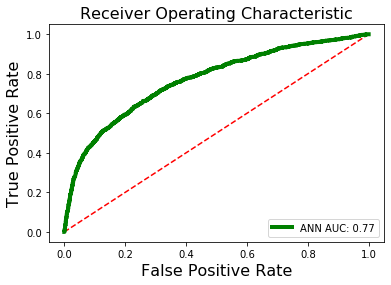

In [61]:
from sklearn.metrics import roc_curve,auc
# Plotting random line
plt.plot(figsize= (15,15))
%matplotlib inline
plt.plot([0,1],[0,1], 'r--' )

#calculating prob
prob= classifier1.predict(xtest)
fpr, tpr, threshold= roc_curve(ytest,prob)
#roc return fpr tpr and threshold so storing them separately
roc_auc= auc(fpr,tpr)

#Ploting ROC
label = 'ANN AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 10)

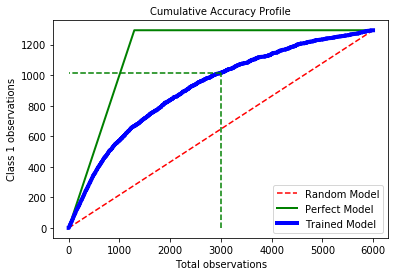

In [64]:
total = len(ytest) #total no of outcomes in y test
count1 = np.sum(ytest) # total values of 1
count0 = total - count1 # total values of 0

#Random Model:  which is based on the fact that the correct detection of class 1.0 will grow linearly
plt.plot([0,total],[0,count1],c='r' , linestyle= '--' , label='Random Model')

#perfect model one which will detect all class 1.0 data points in the same number of tries as there are class 1.0 data points.
# It takes exactly 31 tries for the perfect model to identify 31 class 1.0 data points.
plt.plot([0,count1,total],
        [0,count1,count1],
        c='g',
        linewidth=2,
        label='Perfect Model')

#Trained Model
prob= classifier1.predict(xtest)
modely= [y for _,y in sorted(zip(prob,ytest), reverse=True)] #Sorted in Ascending to get maximum prob in first
y= np.append([0],np.cumsum(modely)) # added 0 to start it from (0,0)
x= np.arange(0,total+1)

plt.plot(x,y, c='b', linewidth=4, label='Trained Model')
plt.xlabel('Total observations', fontsize = 10)
plt.ylabel('Class 1 observations', fontsize = 10)
plt.title('Cumulative Accuracy Profile', fontsize = 10)
plt.legend(loc = 'lower right', fontsize = 10)

# Cap Analysis using the Plot 
#Taking 50% of from x axis
index= int(50*total/100)

#ploting from x axis
plt.plot([index,index],
         [0,y[index]], 'g--')

plt.plot([index,0],
         [y[index], y[index]], 'g--')

In [63]:
# Cap Analysis using AUC
ar= auc([0,total], [0,count1]) #area of random model

ap= auc([0,count1,total], [0,count1,count1]) # area of perfect model

at= auc(x,y) # area of trained model

print("Accuracy Rate for ANN: {}".format(at / ap))

Accuracy Rate for ANN: 0.7959530125244305


In [65]:

y[index] * 100 / max(y)

78.516228748068

1. Less than 60%: Rubbish Model
2. 60% — 70%: Poor Model
3. 70% — 80%: Good Model
4. 80% — 90%: Very Good Model
5. More than 90%: Too Good to be True check overfiting